non trivial dataset -CLASSIFICATION TASK
- preprocessing data +justificar documentacio
- aplicar metodes teoria algoritmes -> buscar millors parametres
    justificar els parametres +explicacio del procediemt
    amb test de parametres a la docu tmb
- interpretar models retornen algoritme --> SOBRETOT decision trees
- evaluar i comparar diferents metodes aplicats
- decidir quin metode es millor pel dataset

ACCURACY molt important

In [ ]:
!pip3 install -U ucimlrepo
!pip3 install --upgrade certifi

from ucimlrepo import fetch_ucirepo

# fetch dataset
#predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Now try to fetch the dataset again
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)
data=fetch_ucirepo(id=697)
# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
#print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)
df=predict_students_dropout_and_academic_success.data

                                              name     role         type  \
0                                   Marital Status  Feature      Integer   
1                                 Application mode  Feature      Integer   
2                                Application order  Feature      Integer   
3                                           Course  Feature      Integer   
4                       Daytime/evening attendance  Feature      Integer   
5                           Previous qualification  Feature      Integer   
6                   Previous qualification (grade)  Feature   Continuous   
7                                      Nacionality  Feature      Integer   
8                           Mother's qualification  Feature      Integer   
9                           Father's qualification  Feature      Integer   
10                             Mother's occupation  Feature      Integer   
11                             Father's occupation  Feature      Integer   
12          

In [17]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
import seaborn as sns

import pandas
from pandas import plotting

%matplotlib inline

In [ ]:
#https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
#WEB DADES

In [6]:
###DRIVE FUNCIONA DADES I DADES2


!pip3 install -U ucimlrepo
!pip3 install --upgrade certifi

from ucimlrepo import fetch_ucirepo

# fetch dataset
#predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Now try to fetch the dataset again
dades = fetch_ucirepo(id=697)
# data (as pandas dataframes)
X = dades.data.features
y = dades.data.targets

# metadata
#print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(dades.variables)
dades2=dades.data

                                              name     role         type  \
0                                   Marital Status  Feature      Integer   
1                                 Application mode  Feature      Integer   
2                                Application order  Feature      Integer   
3                                           Course  Feature      Integer   
4                       Daytime/evening attendance  Feature      Integer   
5                           Previous qualification  Feature      Integer   
6                   Previous qualification (grade)  Feature   Continuous   
7                                      Nacionality  Feature      Integer   
8                           Mother's qualification  Feature      Integer   
9                           Father's qualification  Feature      Integer   
10                             Mother's occupation  Feature      Integer   
11                             Father's occupation  Feature      Integer   
12          

In [5]:
###DRIVE FUNCIONA DADES I DADES2


!pip3 install -U ucimlrepo
!pip3 install --upgrade certifi

from ucimlrepo import fetch_ucirepo

# fetch dataset
#predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Now try to fetch the dataset again
dades = fetch_ucirepo(id=697)
# data (as pandas dataframes)
X = dades.data.features
Y = dades.data.targets

# metadata
#print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(dades.variables)
dades2=predict_students_dropout_and_academic_success.data

print("\n Variables")
print(X.columns)
print(Y.columns)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: certifi
    Found existing installation: certifi 2023.7.22
    Uninstalling certifi-2023.7.22:
      Successfully uninstalled certifi-2023.7.22
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


                                              name     role         type  \
0                                   Marital Status  Feature      Integer   
1                                 Application mode  Feature      Integer   
2                                Application order  Feature      Integer   
3                                           Course  Feature      Integer   
4                       Daytime/evening attendance  Feature      Integer   
5                           Previous qualification  Feature      Integer   
6                   Previous qualification (grade)  Feature   Continuous   
7                                      Nacionality  Feature      Integer   
8                           Mother's qualification  Feature      Integer   
9                           Father's qualification  Feature      Integer   
10                             Mother's occupation  Feature      Integer   
11                             Father's occupation  Feature      Integer   
12          

NameError: ignored

**Exemple primeres 20 files del dataset amb el seu Target**

In [7]:
print(X.head(20))
print(y.head(20))

    Marital Status  Application mode  Application order  Course  \
0                1                17                  5     171   
1                1                15                  1    9254   
2                1                 1                  5    9070   
3                1                17                  2    9773   
4                2                39                  1    8014   
5                2                39                  1    9991   
6                1                 1                  1    9500   
7                1                18                  4    9254   
8                1                 1                  3    9238   
9                1                 1                  1    9238   
10               1                 1                  1    9670   
11               1                 1                  1    9500   
12               1                 1                  2    9853   
13               1                53                  1    925

In [18]:
#columnes del dataset
print("Informació de cada columna")
names=dades['data']['features'].info()

print("Comprovació dels noms de les columnes")
print(dades2.features.columns)

print("Claus de les variables (No usarem)")
print(dades.variables.keys())

Informació de cada columna
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's quali

# Inspecció de les dades

In [13]:
descript_X = X.describe(include="all")
descript_Y = Y.describe(include="all")

print("Descripció of Columnes(Variables) (X):")
print(descript_X)

print("Descripció de les Files (y):")
print(descript_Y)

valunicX=X.apply(lambda col:col.unique())
valunicY=dades2.targets['Target'].unique()

print("Descripció dels valors de Columnes :")
print(valunicX)
print("Descripció dels valors de Target :")
print(valunicY)
#Fixar sobre tot amb els valors de UNIQUE i veure possibles errades

Descripció of Columnes(Variables) (X):
       Marital Status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000        

Hem pogut observar els diferents elements del dataset, però per veure els que ens poden donar problemes amb el dins del seu rang, s'haurà de mirar un per un.

Mirar sobretot els elements que NO son binaris:

* Application mode                                  
* Course                                            
* Previous qualification                          
* Previous qualification (grade)                    
* Nacionality                                       
* Mother's qualification                            
* Father's qualification                            
* Mother's occupation                              
* Father's occupation                               
* Admission grade                                  
* Curricular units 1st sem (credited)               
* Curricular units 1st sem (enrolled)              
* Curricular units 1st sem (evaluations)            
* Curricular units 1st sem (approved)               
* Curricular units 1st sem (grade)                  
* Curricular units 2nd sem (credited)               
* Curricular units 2nd sem (enrolled)               
* Curricular units 2nd sem (evaluations)            
* Curricular units 2nd sem (approved)               
* Curricular units 2nd sem (grade)                  
* Unemployment rate                                
* GDP   

Podem descartar les qualificacions i la professió de la mare i el pare ja que la majoria de casos seran únics. També les unitats fetes a la universitat ja que variaran molt per cada estudiant.
* Application mode                                  
* Course                                            
* Previous qualification                          
* Previous qualification (grade)                    
* Nacionality                                           
* Admission grade                                             
* Unemployment rate                                
* GDP

In [72]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#PER ELS COLORS!!!

num_colors = 2
cmap = cm.get_cmap('plasma', num_colors)

# Get a list of colors in names (not codes)
colors = [cmap(i) for i in range(num_colors)]

# Display the list of colors
print(colors)


[(0.050383, 0.029803, 0.527975, 1.0), (0.940015, 0.975158, 0.131326, 1.0)]


<ipython-input-72-3a9af0950192>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('plasma', num_colors)


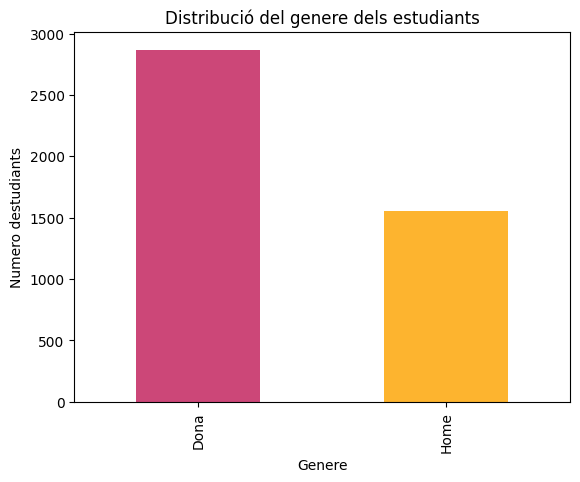

In [80]:
#Relacio del genere entre els estudiants
gender_counts = dades2.features['Gender'].value_counts()
colors2=[(0.798216, 0.280197, 0.469538, 1.0), (0.993814, 0.704741, 0.183043, 1.0)]

gender_counts.plot(kind='bar',color=colors2)

plt.xlabel('Genere')
plt.xticks([0, 1], ['Dona', 'Home'])#1 male 0 female
plt.ylabel('Numero destudiants')
plt.title('Distribució del genere dels estudiants')

plt.show()

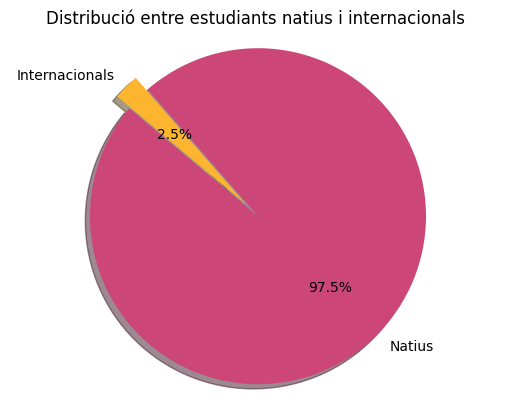

In [77]:
# Relacion entre estudiants natius i internacionals International = 0, Nationality = 1
nat = dades2.features[(dades2.features["International"] == 0) & (dades2.features["Nacionality"] == 1)].shape[0]
inter = dades2.features[dades2.features["International"] == 1].shape[0]

#pie chart
labels = ['Natius', 'Internacionals']
sizes = [nat, inter]
explode = (0.1, 0)
colors2=[(0.798216, 0.280197, 0.469538, 1.0), (0.993814, 0.704741, 0.183043, 1.0)]

plt.pie(sizes, explode=explode, labels=labels, colors=colors2, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribució entre estudiants natius i internacionals ')
plt.show()

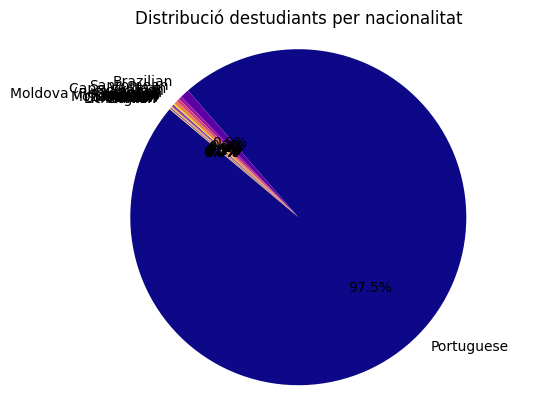

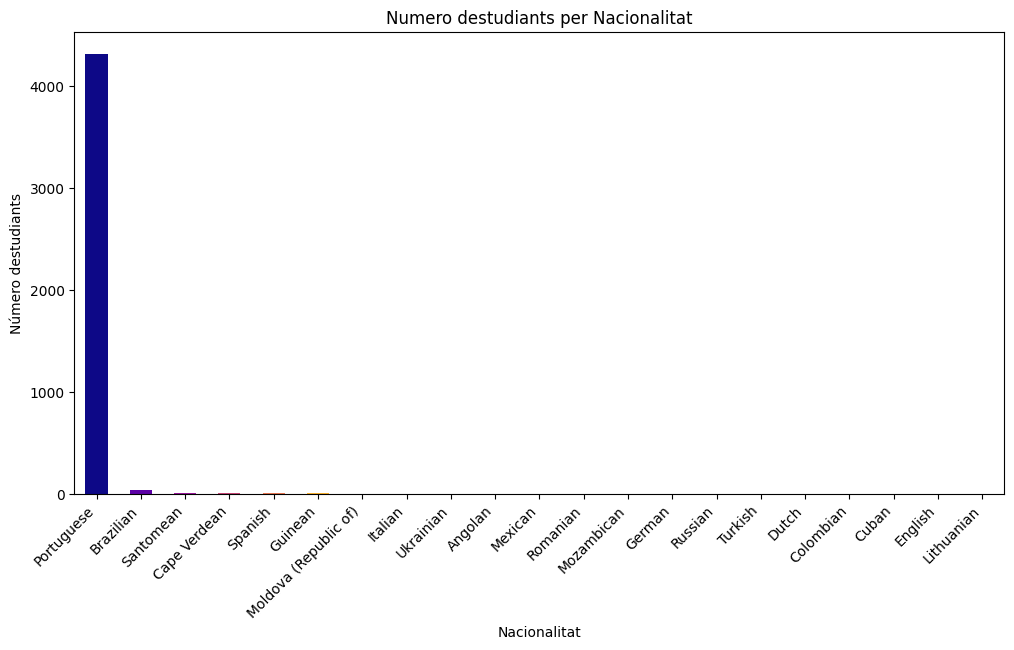

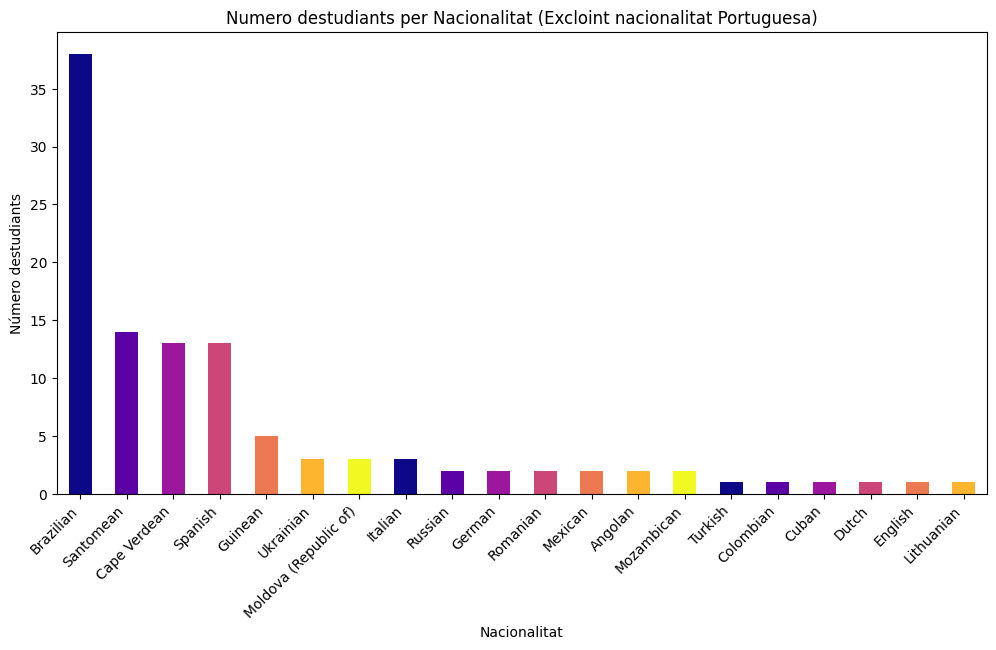

In [83]:
#Relació entre les diferents nacionalitats
nat_noms = {
    1: 'Portuguese', 2: 'German', 6: 'Spanish', 11: 'Italian', 13: 'Dutch',
    14: 'English', 17: 'Lithuanian', 21: 'Angolan', 22: 'Cape Verdean',
    24: 'Guinean', 25: 'Mozambican', 26: 'Santomean', 32: 'Turkish',
    41: 'Brazilian', 62: 'Romanian', 100: 'Moldova (Republic of)',
    101: 'Mexican', 103: 'Ukrainian', 105: 'Russian', 108: 'Cuban',
    109: 'Colombian'
}
nat_num = dades2.features['Nacionality'].map(nat_noms).value_counts()
colors=[(0.050383, 0.029803, 0.527975, 1.0),
 (0.362553, 0.003243, 0.649245, 1.0),
  (0.610667, 0.090204, 0.619951, 1.0),
   (0.798216, 0.280197, 0.469538, 1.0),
    (0.928329, 0.472975, 0.326067, 1.0),
     (0.993814, 0.704741, 0.183043, 1.0),
        (0.940015, 0.975158, 0.131326, 1.0)]

#Pie chart nacionalitats
labels = nat_num.index
sizes = nat_num.values
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribució destudiants per nacionalitat')
plt.show()

#bar chart nacioalitats
plt.figure(figsize=(12, 6))
nat_num.plot(kind='bar', color=colors)
plt.xlabel('Nacionalitat')
plt.ylabel('Número destudiants')
plt.title('Numero destudiants per Nacionalitat')
plt.xticks(rotation=45, ha='right')
plt.show()

#Extreure la nacionalitat Portuguesa- Contar només els internacionals
nat_num = dades2.features['Nacionality'].map(nat_noms)
nat_num = nat_num[nat_num != 'Portuguese'].value_counts()

plt.figure(figsize=(12, 6))
nat_num.plot(kind='bar', color=colors)
plt.xlabel('Nacionalitat')
plt.ylabel('Número destudiants')
plt.title('Numero destudiants per Nacionalitat (Excloint nacionalitat Portuguesa)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

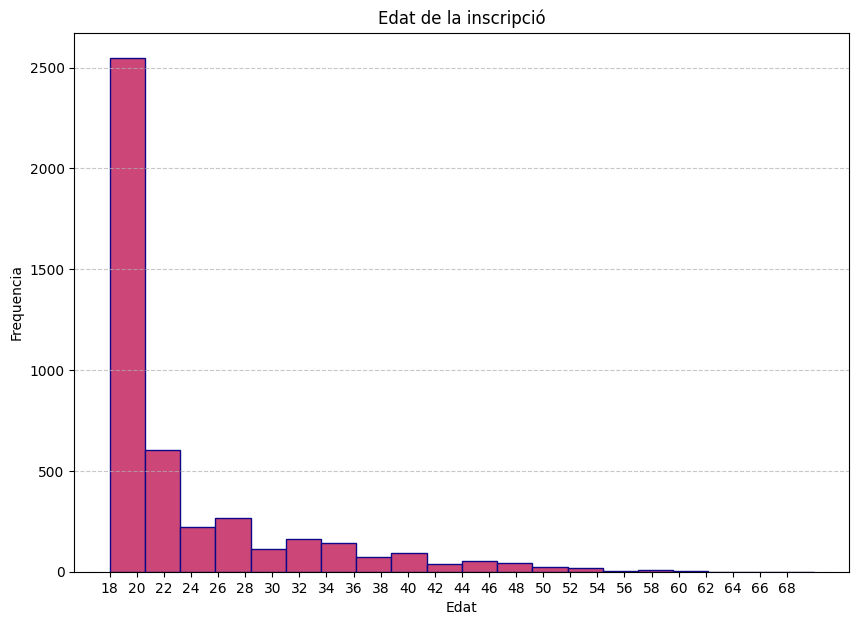

In [108]:
#Relació d'edat dels estudiants
num_bins = 20
age_range = (18, 70)

plt.figure(figsize=(10, 7))
plt.hist(dades2.features["Age at enrollment"], bins=num_bins,range=age_range,color=(0.798216, 0.280197, 0.469538, 1.0), edgecolor=(0.050383, 0.029803, 0.527975, 1.0))

plt.title("Edat de la inscripció")
plt.xlabel("Edat")
plt.ylabel("Frequencia")
plt.xticks(range(18, 70, 2))

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

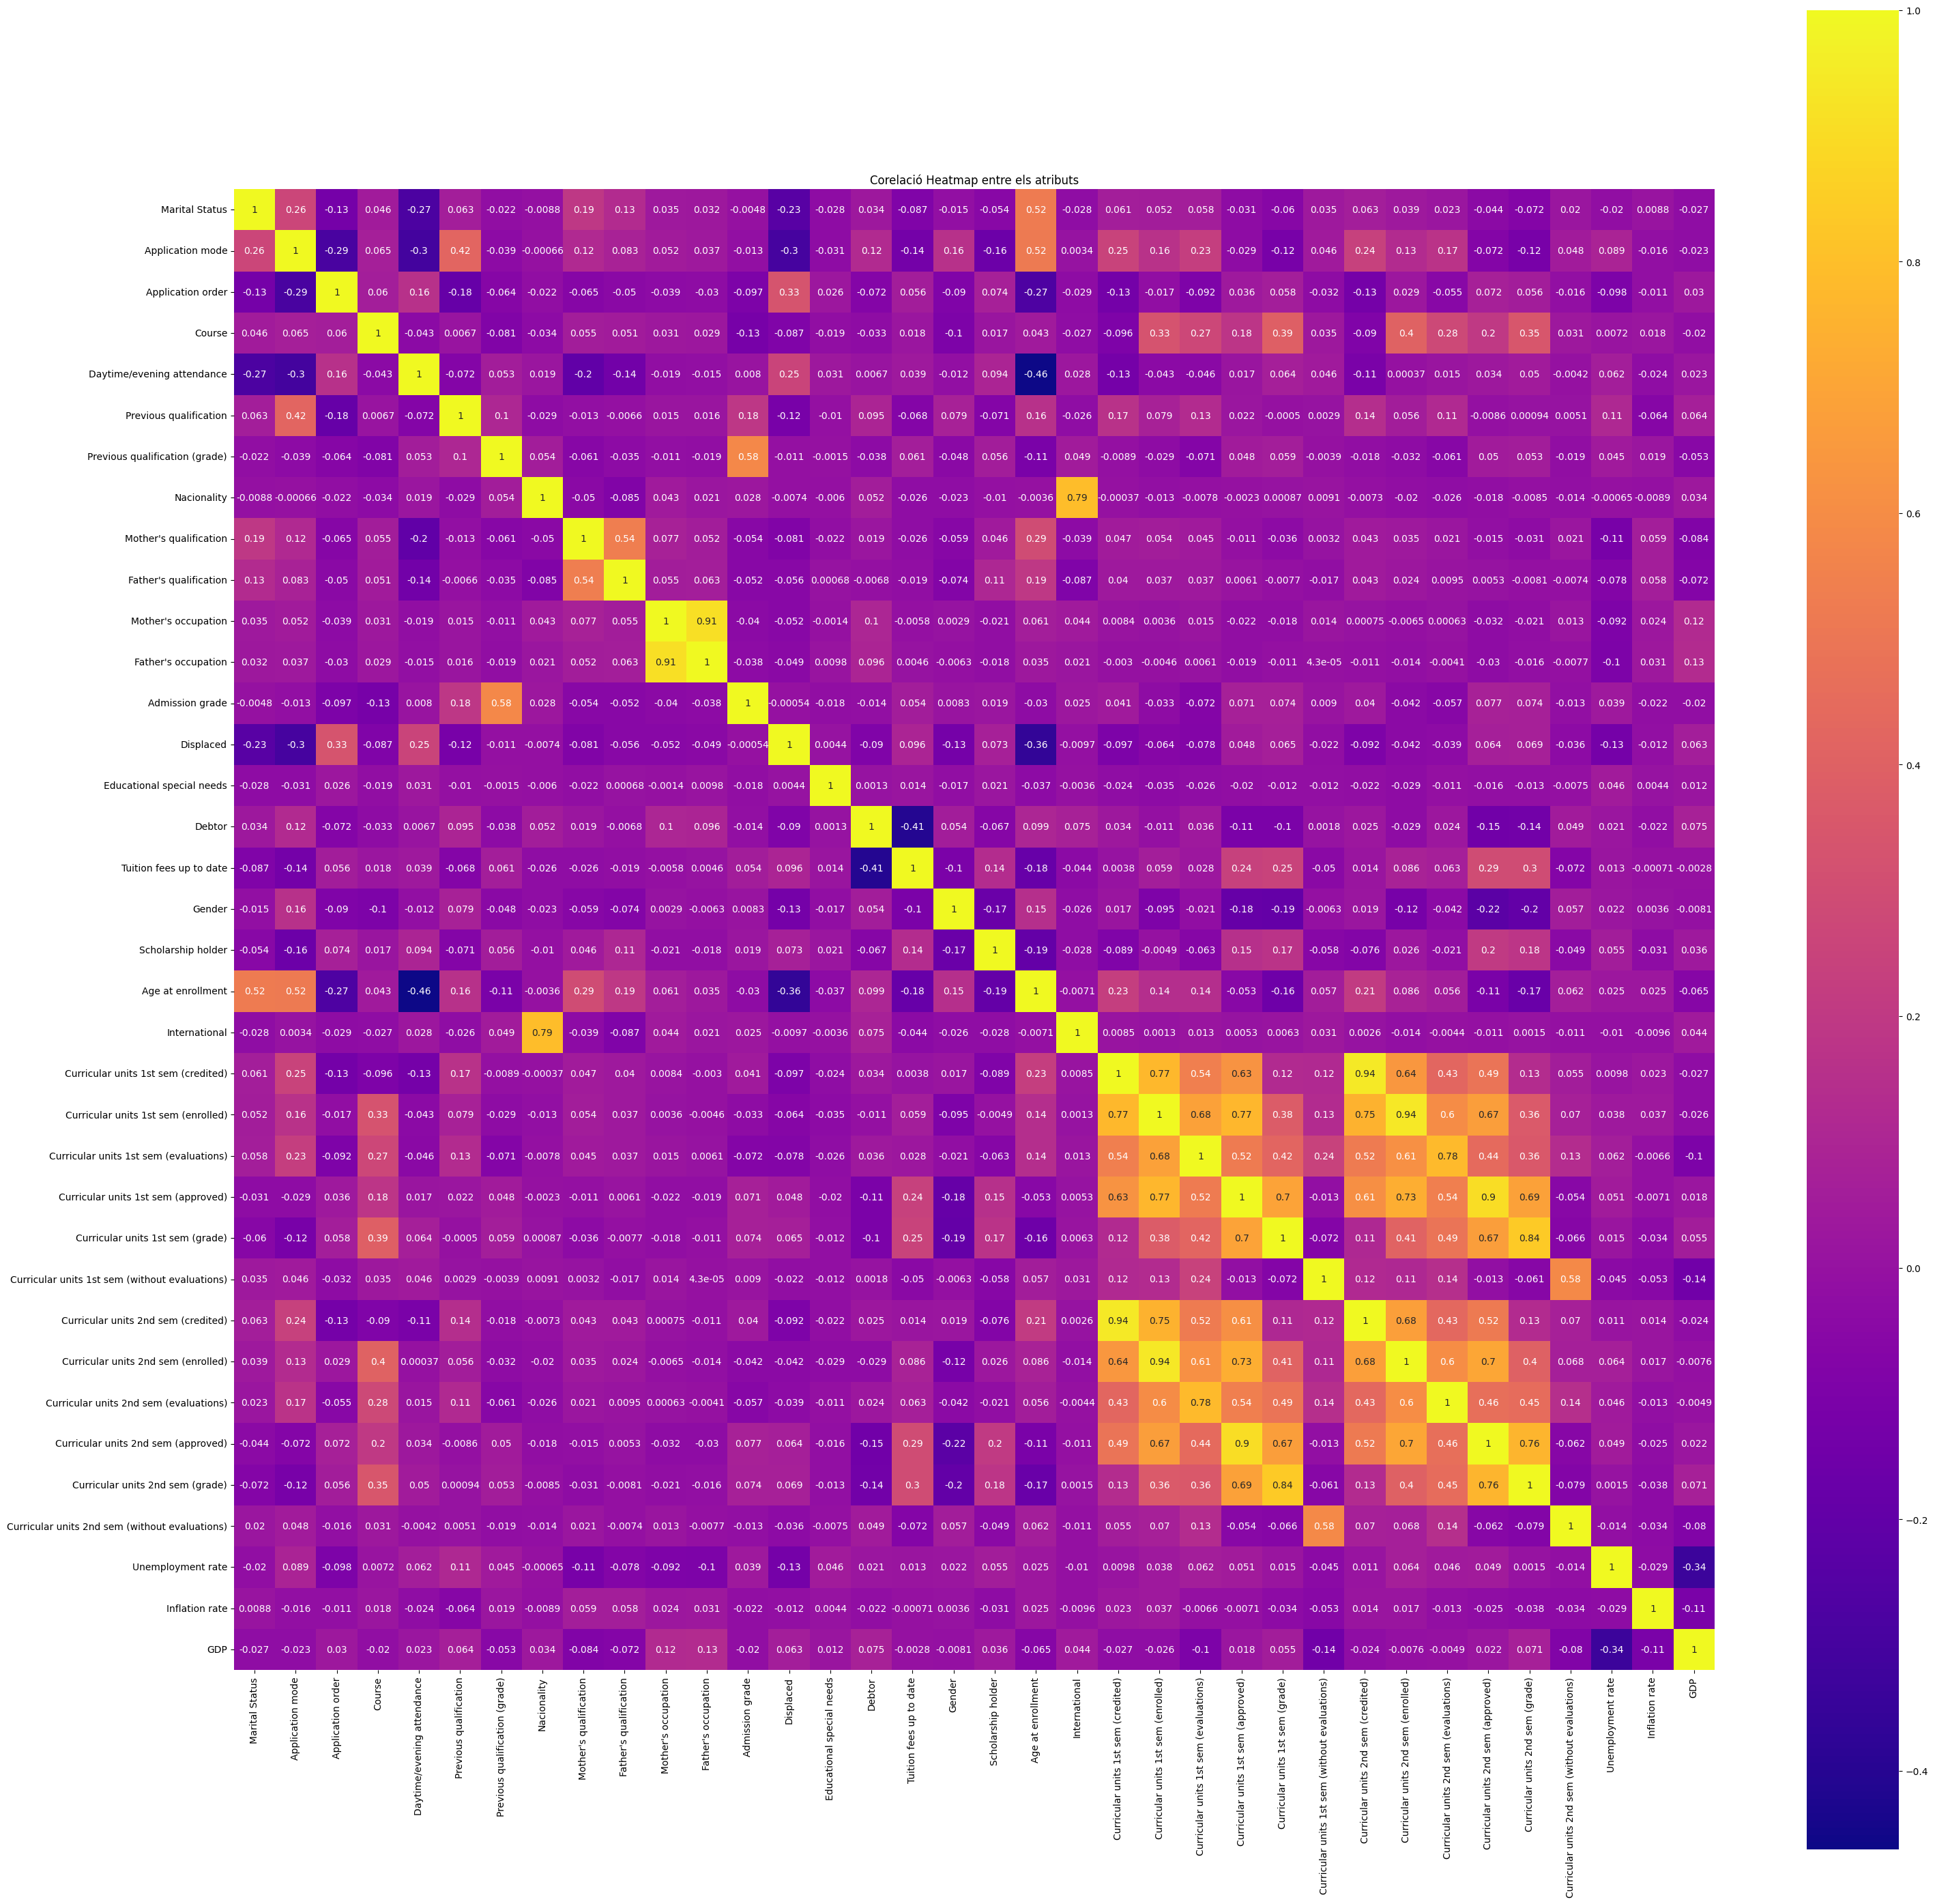

In [67]:
#Matriu de correlació
corr = dades2.features.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(35, 35))
sns.heatmap(corr, cmap='plasma', annot=True, square=True)

plt.title("Corelació Heatmap entre els atributs")
plt.show()

#   Preprocessament de les dades

In [65]:
print(dades.variables)

                                              name     role         type  \
0                                   Marital Status  Feature      Integer   
1                                 Application mode  Feature      Integer   
2                                Application order  Feature      Integer   
3                                           Course  Feature      Integer   
4                       Daytime/evening attendance  Feature      Integer   
5                           Previous qualification  Feature      Integer   
6                   Previous qualification (grade)  Feature   Continuous   
7                                      Nacionality  Feature      Integer   
8                           Mother's qualification  Feature      Integer   
9                           Father's qualification  Feature      Integer   
10                             Mother's occupation  Feature      Integer   
11                             Father's occupation  Feature      Integer   
12          

In [75]:
print("Numero de files duplicades",dades.data.targets.duplicated().sum())
print(dades.data.targets)
dades.items.describe(include="all").transpose

Numero de files duplicades 4421
        Target
0      Dropout
1     Graduate
2      Dropout
3     Graduate
4     Graduate
...        ...
4419  Graduate
4420   Dropout
4421   Dropout
4422  Graduate
4423  Graduate

[4424 rows x 1 columns]


AttributeError: ignored

Count 4424 instancies entrades

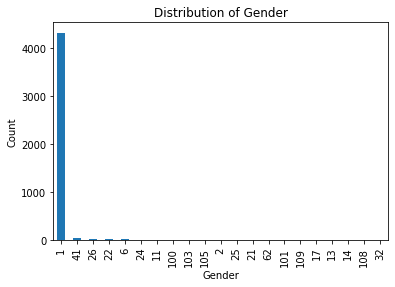

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Gender' is a categorical column in your DataFrame
gender_counts = data['Nacionality'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')

# Display the plot
plt.show()

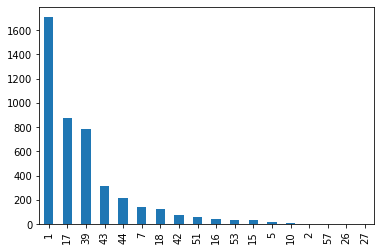

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Gender' is a categorical column in your DataFrame
gender_counts = data['Application mode'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')

# Display the plot
plt.show()

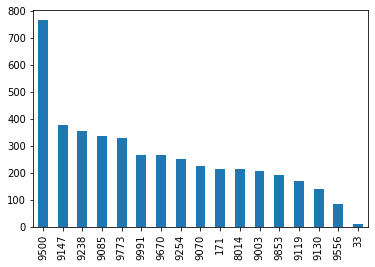

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Gender' is a categorical column in your DataFrame
gender_counts = data['Course'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')

# Display the plot
plt.show()

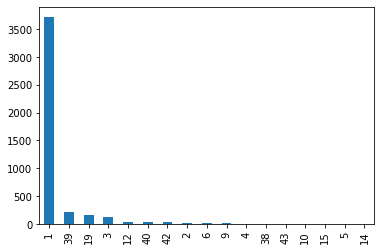

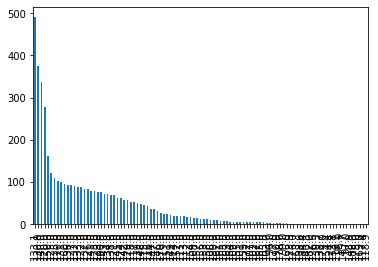

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Gender' is a categorical column in your DataFrame
gender_counts = data['Previous qualification'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')

# Display the plot
plt.show()

gender_counts = data['Previous qualification (grade)'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')

# Display the plot
plt.show()

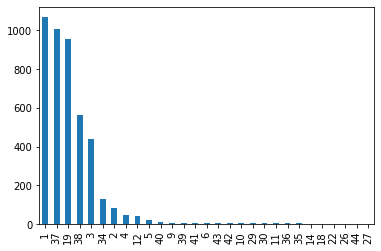

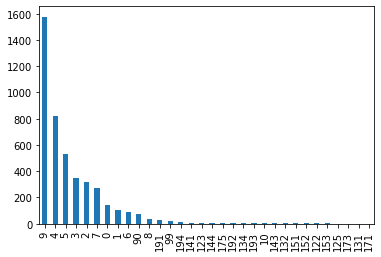

In [ ]:

# Assuming 'Gender' is a categorical column in your DataFrame
gender_counts = data["Mother's qualification"].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')

# Display the plot
plt.show()

gender_counts = data["Mother's occupation"].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')

# Display the plot
plt.show()

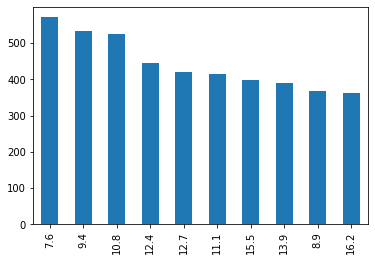

In [ ]:
Unemployment = data["Unemployment rate"].value_counts()

# Plot the counts
Unemployment.plot(kind='bar')

# Display the plot
plt.show()

In [ ]:
data.isnull().any()

Marital status                                    False
Application mode                                  False
Application order                                 False
Course                                            False
Daytime/evening attendance\t                      False
Previous qualification                            False
Previous qualification (grade)                    False
Nacionality                                       False
Mother's qualification                            False
Father's qualification                            False
Mother's occupation                               False
Father's occupation                               False
Admission grade                                   False
Displaced                                         False
Educational special needs                         False
Debtor                                            False
Tuition fees up to date                           False
Gender                                          

NO hi ha cap dada amb valors nuls
Ara mirar i homogenitzar les característiques per

# Data mining models


### Naı̈ve Bayes

### k-NN

### Decision Trees

### Support Vector Machines

### Meta-learning algorithms